In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# 전처리 과정을 하면서 dummies를 사용해서 OneHotEncode를 했습니다.
df = pd.read_csv('StudentsPerformance.csv')
df.head()
df.info()
df.describe()
df_d = pd.get_dummies(df)
df_d.head(2)

# 알고리즘에 적용하고자 train, test 파일을 나누어서 LinearRegression을 적용해보았고 MSE 값을 출력해보았습니다.
y_target = df_d['writing score']
X_data = df_d.drop(['writing score'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
LR_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, LR_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

# math와 reading 값에 따른 writing 값을 회귀그래프로 출력해보았습니다.
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=1, squeeze=False)
lm_reatures = ['math score', 'reading score']
for i, feature in enumerate(lm_reatures):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='writing score', data = df_d, ax=axs[row][col])
    
# 최적의 회귀 값을 찾기 위해 alpha 값을 찾아보았고 10이 가장 적절한 값이었다.
alphas = [0, 1, 10, 100]
for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=4)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print("alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}".format(alpha, avg_rmse))
    

# alpha 값에 대한 그래프를 그리려고 하다가 멈췄습니다. 
fig, axs = plt.subplots(figsize=(10,5), nrows=1, ncols=4)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [38]:
df = pd.read_csv('StudentsPerformance.csv')

# 전처리 과정

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [7]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [8]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [10]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [11]:
df['race/ethnicity'] = df['race/ethnicity'].str[-1]
print(df['race/ethnicity'])

0      B
1      C
2      B
3      A
4      C
      ..
995    E
996    C
997    C
998    D
999    D
Name: race/ethnicity, Length: 1000, dtype: object


In [70]:
df_d = pd.get_dummies(df)
df_d.head(2)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0


In [46]:
y_target = df_d['writing score']
X_data = df_d.drop(['writing score'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=156)

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
LR_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, LR_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# print("variance score : {0:.3f}".format(r2_score(y_test, LR_pred)))

MSE : 12.146, RMSE : 3.485


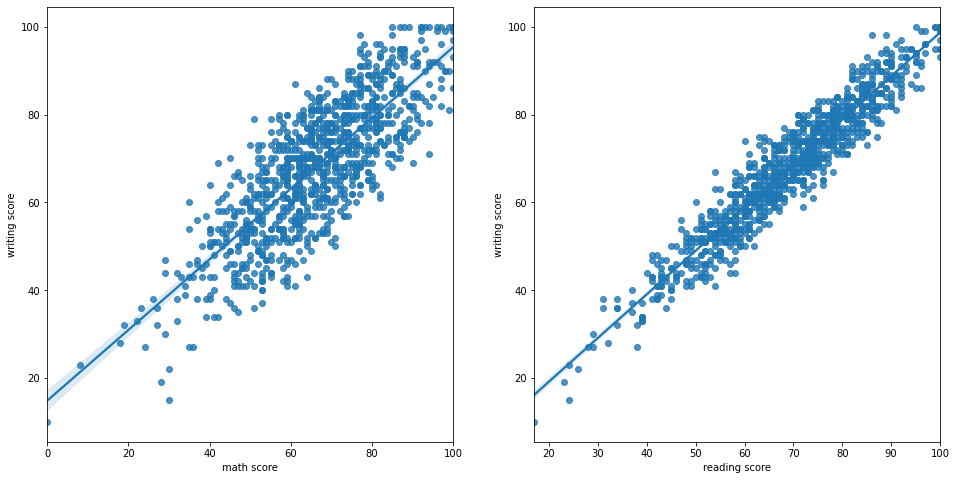

In [52]:
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=1, squeeze=False)
lm_reatures = ['math score', 'reading score']
for i, feature in enumerate(lm_reatures):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='writing score', data = df_d, ax=axs[row][col])

In [66]:
alphas = [0, 1, 10, 100]
for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=4)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print("alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}".format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 3.584
alpha 1 일 때 5 folds의 평균 RMSE : 3.539
alpha 10 일 때 5 folds의 평균 RMSE : 3.539
alpha 100 일 때 5 folds의 평균 RMSE : 3.673


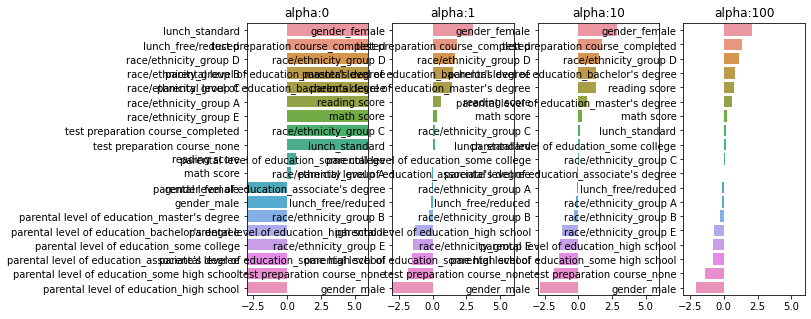

In [69]:
fig, axs = plt.subplots(figsize=(10,5), nrows=1, ncols=4)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [74]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' +str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending = False)

,alpha:0,alpha:1,alpha:10,alpha:100
lunch_free/reduced,9.667252e+14,-0.137973,-0.139566,-0.144924
lunch_standard,9.667252e+14,0.137973,0.139566,0.144924
race/ethnicity_group D,7.254824e+14,1.636738,1.570224,1.101090
race/ethnicity_group B,7.254824e+14,-0.285486,-0.290321,-0.271178
race/ethnicity_group C,7.254824e+14,0.164745,0.150846,0.065683
race/ethnicity_group A,7.254824e+14,-0.043244,-0.073916,-0.155369
race/ethnicity_group E,7.254824e+14,-1.472753,-1.356832,-0.740225
test preparation course_completed,1.302316e+14,1.822307,1.767112,1.373401
test preparation course_none,1.302316e+14,-1.822307,-1.767112,-1.373401
reading score,6.487120e-01,0.648755,0.660351,0.736567


In [ ]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None, verbose=True, return_coeff=True):
    
    coeff_df = pd.DataFrame()
    if verbose : print("###### ", model_name, "######")
    for param in params:
        if model_name == 'Ridge': 
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' :
            model = ElasticNet(alpha = param, l1_ratio = 0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = "neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print("alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f}".format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변화하고 이를 DataFrame의 컬럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname]=coeff
            
    return coeff_df
# end of get_linear_regre_eval